In [34]:

import sqlite3
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
warnings.filterwarnings("ignore")

In [35]:
conn = sqlite3.connect("imdb.db")

In [36]:
consulta="SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type"
resultado=pd.read_sql_query(consulta,conn)

In [37]:
display(resultado)

,type,COUNT
0,movie,583422
1,radioEpisode,1
2,radioSeries,1
3,short,822768
4,tvEpisode,5942131
5,tvMiniSeries,38492
6,tvMovie,132289
7,tvSeries,211483
8,tvShort,10154
9,tvSpecial,33473


In [38]:
resultado['perc']=(resultado['COUNT']/resultado['COUNT'].sum())*100
display(resultado)

,type,COUNT,perc
0,movie,583422,7.186440
1,radioEpisode,1,0.000012
2,radioSeries,1,0.000012
3,short,822768,10.134642
4,tvEpisode,5942131,73.193619
5,tvMiniSeries,38492,0.474134
6,tvMovie,132289,1.629501
7,tvSeries,211483,2.604992
8,tvShort,10154,0.125074
9,tvSpecial,33473,0.412312


In [39]:
others = {}
others['COUNT']=resultado[resultado['perc'] < 5]['COUNT'].sum()
others['perc']=resultado[resultado['perc'] < 5]['perc'].sum()
others['type']='others'
others

{'COUNT': 770052, 'perc': 9.485299579115177, 'type': 'others'}

In [40]:
resultado = resultado[resultado['perc'] > 5]
resultado = resultado.append(others, ignore_index = True)
resultado = resultado.sort_values(by = 'COUNT', ascending=False)
resultado

,type,COUNT,perc
2,tvEpisode,5942131,73.193619
1,short,822768,10.134642
3,others,770052,9.485300
0,movie,583422,7.186440


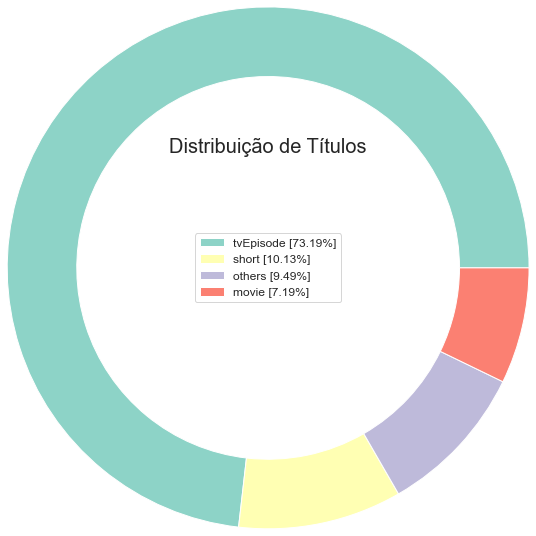

In [42]:
labels = [str(resultado['type'][i])+' '+'['+str(round(resultado['perc'][i],2)) +'%'+']' for i in resultado.index]

# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

f = plt.figure()

plt.pie(resultado['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()